In [1]:
# For sending GET requests from the API
import requests
# For saving access tokens and for file management when creating and adding to the dataset
import os
# For dealing with json responses we receive from the API
import json
# For displaying the data after
import pandas as pd
# For saving the response data in CSV format
import csv
# For parsing the dates received from twitter in readable formats
import datetime
import dateutil.parser
import unicodedata
#To add wait time between requests
import time

import dataframe_image as dfi

In [2]:
os.environ['TOKEN'] = "AAAAAAAAAAAAAAAAAAAAAF1QXgEAAAAAU9xMlO3zpRycPNqrqeakUDIYGcE%3DnVZUKvUQJzCLO1174RVwp0B7qTTxnWPa2xBCc0IwBq6vZIwhVP"

In [3]:

# To set your environment variables in your terminal run the following line:
# export 'BEARER_TOKEN'='<your_bearer_token>'
bearer_token = os.environ.get("TOKEN")


def create_url():
    # Replace with user ID below
    user_id = 47629619
    return "https://api.twitter.com/2/users/{}/mentions".format(user_id)
def bearer_oauth(r):
    """
    Method required by bearer token authentication.
    """

    r.headers["Authorization"] = f"Bearer {bearer_token}"
    r.headers["User-Agent"] = "v2UserMentionsPython"
    return r





    

In [4]:
def get_params( start, end,year=2021, day="01"):
    # Tweet fields are adjustable.
    # Options include:
    # attachments, author_id, context_annotations,
    # conversation_id, created_at, entities, geo, id,
    # in_reply_to_user_id, lang, non_public_metrics, organic_metrics,
    # possibly_sensitive, promoted_metrics, public_metrics, referenced_tweets,
    # source, text, and withheld
    if end == "12":
        day="31"
    query_params = {"max_results":100,
                    "start_time" : f"{year}-{start}-01T00:00:00.000Z",
                    "end_time" : f"{year}-{end}-{day}T00:00:00.000Z",
                    'expansions': 'author_id,in_reply_to_user_id,geo.place_id',
                    'tweet.fields': 'id,text,author_id,in_reply_to_user_id,geo,conversation_id,created_at,lang,public_metrics,referenced_tweets,reply_settings,source',
                    'user.fields': 'id,name,username,created_at,description,public_metrics,verified',
                    'place.fields': 'full_name,id,country,country_code,geo,name,place_type',
        
                    'next_token': {}}
    return  query_params




def connect_to_endpoint(url, params):
    response = requests.request("GET", url, auth=bearer_oauth, params=params)
    print(response.status_code)
    if response.status_code != 200:
        raise Exception(
            "Request returned an error: {} {}".format(
                response.status_code, response.text
            )
        )
    return response.json()


In [5]:
url = create_url()

In [6]:
df_meta = pd.DataFrame()
df_data = pd.DataFrame()
df_user = pd.DataFrame()
df_place = pd.DataFrame()
for year in ["2020","2021"]:
    for i in range(1,13):
        if i < 9:
            start = f"0{i}"
            end =  f"0{i+1}"
        elif i == 9:
            start = f"0{i}"
            end =  f"{i+1}"
        elif i < 12:
            start = f"{i}"
            end =  f"{i+1}"
        else:
            start = f"{i}"
            end =  f"{i}"
        
        
        params = get_params(start,end, year = year)
        json_response = connect_to_endpoint(url, params)
        df = pd.json_normalize(json_response)
        if df["meta.result_count"][0] != 0:
            df_meta = pd.concat([df_meta,df], ignore_index=True)
            df = pd.json_normalize(json_response["data"])
            df_data = pd.concat([df_data,df],ignore_index=True)
            df = pd.json_normalize(json_response["includes"]["users"])
            df_user = pd.concat([df_user,df],ignore_index=True)
            try:
                
                df = pd.json_normalize(json_response["includes"]["places"])
                df["date"] = pd.DataFrame({"date": [f"{year} - {start}" for i in range(len(df))]})
                df_place = pd.concat([df_place,df],ignore_index=True)
            except:
                pass
            


200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200


In [8]:
len(df_meta)

18

In [9]:
len(df_data)

846

In [10]:
len(df_user)

688

In [11]:
len(df_place)

22

In [7]:
df_meta

,data,includes.users,meta.oldest_id,meta.newest_id,meta.result_count,includes.places,errors,meta.next_token
0,"[{'created_at': '2020-07-29T16:40:57.000Z', 'a...","[{'verified': False, 'created_at': '2020-05-04...",1286354891959611403,1288514861765468161,3,NaN,NaN,NaN
1,"[{'lang': 'de', 'reply_settings': 'everyone', ...","[{'created_at': '2013-09-13T19:11:43.000Z', 'i...",1290619247530475525,1300284662728753160,33,"[{'place_type': 'city', 'id': '1d5d57f325d0597...",NaN,NaN
2,"[{'text': '@stepstone_de - I am FREELANCE, so ...","[{'created_at': '2009-02-20T11:32:29.000Z', 'n...",1301050982957297664,1310880392019349504,29,NaN,NaN,NaN
3,"[{'reply_settings': 'everyone', 'public_metric...","[{'public_metrics': {'followers_count': 368, '...",1311522485276479491,1322557206374588417,42,"[{'place_type': 'city', 'id': '8025063f29fa041...",NaN,NaN
4,"[{'lang': 'de', 'text': 'Jahresrückblick 2020:...","[{'id': '1276858690482700288', 'name': 'HR JOU...",1323217089373655045,1344187845246902272,82,"[{'id': '01534a4fa9b4d449', 'geo': {'type': 'F...",NaN,NaN
5,"[{'reply_settings': 'everyone', 'public_metric...","[{'public_metrics': {'followers_count': 280, '...",1333780996571897856,1344187845246902272,39,"[{'place_type': 'admin', 'id': '01534a4fa9b4d4...",NaN,NaN
6,"[{'lang': 'de', 'reply_settings': 'everyone', ...","[{'created_at': '2009-07-14T16:11:44.000Z', 'i...",1347461544125353985,1355567353392726024,23,"[{'place_type': 'city', 'id': '5bcd72da50f0ee7...",NaN,NaN
7,"[{'created_at': '2021-02-26T13:00:45.000Z', 'l...","[{'public_metrics': {'followers_count': 626, '...",1356165331606265857,1365285675117985792,35,"[{'id': '5bcd72da50f0ee77', 'full_name': 'Hamb...",NaN,NaN
8,"[{'author_id': '904253124', 'conversation_id':...","[{'verified': False, 'created_at': '2012-10-25...",1366300943545950211,1377148150528442369,53,NaN,NaN,NaN
9,"[{'lang': 'de', 'text': 'Haben Sie Ihr Maximum...","[{'id': '68671923', 'name': 'MM MaschinenMarkt...",1377718102918623233,1388060069489790979,36,"[{'id': '218cddc447e551a4', 'geo': {'type': 'F...",NaN,NaN


In [8]:
df_data = df_data.drop_duplicates(subset="id")

In [9]:
df_data.reset_index(drop=True, inplace=True)

In [10]:
df_data.head()

,created_at,author_id,reply_settings,conversation_id,source,id,text,lang,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,in_reply_to_user_id,geo.place_id
0,2020-07-29T16:40:57.000Z,1257402849178333185,everyone,1288514861765468161,Twitter for iPhone,1288514861765468161,Ihr sucht einen Job mit #Homeoffice?Damit seid...,de,0,0,0,0,NaN,NaN
1,2020-07-28T16:20:03.000Z,3130698441,everyone,1288147213714100227,Sprout Social,1288147213714100227,Der aktuelle Gehaltsreport von @stepstone_de b...,de,0,0,1,0,NaN,NaN
2,2020-07-23T17:38:00.000Z,14657622,everyone,1286354891959611403,Twitter Web App,1286354891959611403,In welchem #Beruf kann man ein üppiges Gehalt ...,de,0,0,0,1,NaN,NaN
3,2020-08-31T04:09:56.000Z,1861471160,everyone,1300284662728753160,Twitter for iPhone,1300284662728753160,Das Kurzbriefing mit News und Tipps zum Start ...,de,1,1,1,0,NaN,NaN
4,2020-08-28T20:44:55.000Z,1241864005704208396,everyone,1298947823900164098,Twitter for Android,1299447896950140929,@olewin @AndreasStiehler @iaostuttgart @iab_ne...,de,0,0,2,0,75222479,1d5d57f325d05975


In [11]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   created_at                    719 non-null    object
 1   author_id                     719 non-null    object
 2   reply_settings                719 non-null    object
 3   conversation_id               719 non-null    object
 4   source                        719 non-null    object
 5   id                            719 non-null    object
 6   text                          719 non-null    object
 7   lang                          719 non-null    object
 8   public_metrics.retweet_count  719 non-null    int64 
 9   public_metrics.reply_count    719 non-null    int64 
 10  public_metrics.like_count     719 non-null    int64 
 11  public_metrics.quote_count    719 non-null    int64 
 12  in_reply_to_user_id           334 non-null    object
 13  geo.place_id        

In [12]:
df_user = df_user.drop_duplicates()

In [13]:
df_user.reset_index(drop=True, inplace=True)

In [14]:
df_user.head()

,verified,created_at,name,username,id,description,public_metrics.followers_count,public_metrics.following_count,public_metrics.tweet_count,public_metrics.listed_count
0,False,2020-05-04T20:14:03.000Z,Generation Homeoffice,GenHomeoffice,1257402849178333185,Wir sind die neue Webpräsenz rund um das Thema...,80,222,143,0
1,False,2015-03-31T13:23:34.000Z,Talentsoft DACH,Talentsoft_DE,3130698441,Talentsoft ist ein führender Anbieter von #HRI...,368,404,1896,166
2,True,2008-05-05T09:12:13.000Z,BASIC thinking,basicthinking,14657622,"Dein Online-Magazin rund um Social Media, Mark...",38089,744,31719,1697
3,False,2013-09-13T19:11:43.000Z,Sven Lechtleitner,lechtleitner,1861471160,Autor & Journalist | Chefredakteur Magazin „Hu...,1249,244,353,47
4,False,2020-03-22T23:07:44.000Z,Dr. Alexandra Heinzelmann,HeinzelmannDr,1241864005704208396,"Führungskräftetraining, Online-Coaching, Feel-...",338,941,300,2


In [16]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   verified                        434 non-null    bool  
 1   created_at                      434 non-null    object
 2   name                            434 non-null    object
 3   username                        434 non-null    object
 4   id                              434 non-null    object
 5   description                     434 non-null    object
 6   public_metrics.followers_count  434 non-null    int64 
 7   public_metrics.following_count  434 non-null    int64 
 8   public_metrics.tweet_count      434 non-null    int64 
 9   public_metrics.listed_count     434 non-null    int64 
dtypes: bool(1), int64(4), object(5)
memory usage: 31.1+ KB


In [17]:
df = pd.merge(df_data, df_user, left_on="author_id",right_on="id", how = "left")
df.head()

,created_at_x,author_id,reply_settings,conversation_id,source,id_x,text,lang,public_metrics.retweet_count,public_metrics.reply_count,...,verified,created_at_y,name,username,id_y,description,public_metrics.followers_count,public_metrics.following_count,public_metrics.tweet_count,public_metrics.listed_count
0,2020-07-29T16:40:57.000Z,1257402849178333185,everyone,1288514861765468161,Twitter for iPhone,1288514861765468161,Ihr sucht einen Job mit #Homeoffice?Damit seid...,de,0,0,...,False,2020-05-04T20:14:03.000Z,Generation Homeoffice,GenHomeoffice,1257402849178333185,Wir sind die neue Webpräsenz rund um das Thema...,80,222,143,0
1,2020-07-28T16:20:03.000Z,3130698441,everyone,1288147213714100227,Sprout Social,1288147213714100227,Der aktuelle Gehaltsreport von @stepstone_de b...,de,0,0,...,False,2015-03-31T13:23:34.000Z,Talentsoft DACH,Talentsoft_DE,3130698441,Talentsoft ist ein führender Anbieter von #HRI...,368,404,1896,166
2,2020-07-23T17:38:00.000Z,14657622,everyone,1286354891959611403,Twitter Web App,1286354891959611403,In welchem #Beruf kann man ein üppiges Gehalt ...,de,0,0,...,True,2008-05-05T09:12:13.000Z,BASIC thinking,basicthinking,14657622,"Dein Online-Magazin rund um Social Media, Mark...",38089,744,31719,1697
3,2020-08-31T04:09:56.000Z,1861471160,everyone,1300284662728753160,Twitter for iPhone,1300284662728753160,Das Kurzbriefing mit News und Tipps zum Start ...,de,1,1,...,False,2013-09-13T19:11:43.000Z,Sven Lechtleitner,lechtleitner,1861471160,Autor & Journalist | Chefredakteur Magazin „Hu...,1249,244,353,47
4,2020-08-28T20:44:55.000Z,1241864005704208396,everyone,1298947823900164098,Twitter for Android,1299447896950140929,@olewin @AndreasStiehler @iaostuttgart @iab_ne...,de,0,0,...,False,2020-03-22T23:07:44.000Z,Dr. Alexandra Heinzelmann,HeinzelmannDr,1241864005704208396,"Führungskräftetraining, Online-Coaching, Feel-...",338,941,300,2


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 726 entries, 0 to 725
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   lang                            726 non-null    object
 1   created_at_x                    726 non-null    object
 2   id_x                            726 non-null    object
 3   text                            726 non-null    object
 4   author_id                       726 non-null    object
 5   source                          726 non-null    object
 6   reply_settings                  726 non-null    object
 7   conversation_id                 726 non-null    object
 8   public_metrics.retweet_count    726 non-null    int64 
 9   public_metrics.reply_count      726 non-null    int64 
 10  public_metrics.like_count       726 non-null    int64 
 11  public_metrics.quote_count      726 non-null    int64 
 12  in_reply_to_user_id             337 non-null    ob

In [21]:
d = {}
for i in df.columns:
    if "public_metric" in i:
        v = i.split(".")[1]
        d[i] = v
d

{'public_metrics.retweet_count': 'retweet_count',
 'public_metrics.reply_count': 'reply_count',
 'public_metrics.like_count': 'like_count',
 'public_metrics.quote_count': 'quote_count',
 'public_metrics.followers_count': 'followers_count',
 'public_metrics.following_count': 'following_count',
 'public_metrics.tweet_count': 'tweet_count',
 'public_metrics.listed_count': 'listed_count'}

In [22]:
df = df.rename(columns=d)

In [23]:
df["length"] = df.text.apply(lambda x: len(x))

In [24]:
from germansentiment import SentimentModel

In [25]:
model = SentimentModel()

In [26]:
df["sent"] = df.text.apply(lambda x: model.predict_sentiment([x]))

In [27]:
df["sent"] = df.sent.apply(lambda x : str(x)[2:5])

In [28]:
df["date"] = pd.to_datetime(df.created_at_x)

In [29]:
df["day"] = df.date.dt.day

In [30]:
df["month"] = df.date.dt.month

In [61]:
df["year"] = df.date.dt.year

In [32]:
df["dayofweek"] = df.date.dt.dayofweek

In [33]:
df["weekorend"] = df.dayofweek.apply(lambda x: "weekend" if x in [5,6] else "week")

In [34]:
df["has"] = df.text.apply(lambda x: x.count("#"))

In [35]:
df["men"] = df.text.apply(lambda x: x.count("@"))

In [36]:
df.head()

,lang,created_at_x,id_x,text,author_id,source,reply_settings,conversation_id,retweet_count,reply_count,...,length,sent,date,day,month,year,dayofweek,weekorend,has,men
0,de,2020-07-29T16:40:57.000Z,1288514861765468161,Ihr sucht einen Job mit #Homeoffice?Damit seid...,1257402849178333185,Twitter for iPhone,everyone,1288514861765468161,0,0,...,219,pos,2020-07-29 16:40:57+00:00,29,7,2,2,week,1,2
1,de,2020-07-28T16:20:03.000Z,1288147213714100227,Der aktuelle Gehaltsreport von @stepstone_de b...,3130698441,Sprout Social,everyone,1288147213714100227,0,0,...,252,neu,2020-07-28 16:20:03+00:00,28,7,1,1,week,2,1
2,de,2020-07-23T17:38:00.000Z,1286354891959611403,In welchem #Beruf kann man ein üppiges Gehalt ...,14657622,Twitter Web App,everyone,1286354891959611403,0,0,...,172,neu,2020-07-23 17:38:00+00:00,23,7,3,3,week,2,1
3,en,2020-07-23T05:00:40.000Z,1286164303385636870,Komm in unser #Team!\nOnline-Shop #Manager (m/...,90622681,Hootsuite Inc.,everyone,1286164303385636870,0,0,...,301,neu,2020-07-23 05:00:40+00:00,23,7,3,3,week,11,5
4,de,2020-07-22T12:49:32.000Z,1285919908430307328,#OnTheAgenda – Eine aktuelle Umfrage der @Hand...,1207345738340093952,Twitter Web App,everyone,1285919908430307328,1,0,...,298,neu,2020-07-22 12:49:32+00:00,22,7,2,2,week,1,2


In [37]:
df.sort_values(by = "like_count", ascending=False)\
.head(10)[["name","verified","text","like_count","retweet_count","followers_count","tweet_count","sent","length","weekorend","has","men"]]


,name,verified,text,like_count,retweet_count,followers_count,tweet_count,sent,length,weekorend,has,men
416,She Drives Mobility,False,800.000 Menschen arbeiten in der Autoindustrie...,117,39,31868,99771,neu,276,week,1,1
244,Peter Wittkamp,True,"Danke, @stepstone_de. Ich melde mich gegebenen...",92,0,63318,14222,pos,76,week,0,1
619,C. Storch,False,"Also @stepstone_de hätte da was für Sie, Herr ...",79,0,11009,61596,neu,84,weekend,0,2
679,Nick Marten,False,Ein erster kleiner Beitrag mit einer großartig...,60,3,2820,4460,neu,291,week,2,1
534,Julia Mayer-Buch,False,#LaschetDarfNichtKanzlerWerden #LaschetVerhind...,51,6,178,366,neg,108,week,2,1
379,HI! Thomas Franke,False,Klimaschutz durch #UX-Design? #JoinTheTeam:\n📢...,41,30,1686,9600,neu,296,weekend,5,2
35,Raul Krauthausen,True,"im Gespräch mit @stepstone_de ""Mit der Unterze...",32,12,56364,25419,neu,262,week,0,1
548,Red Carpet Activists,False,Die ehrliche Wahlkampagne der @CDU gecovert vo...,30,9,628,5406,neg,301,week,2,2
325,Carina Kontio,False,Scheisse. Via @stepstone_de ++ Gehälter von Fr...,29,4,6061,14442,neg,272,week,0,1
584,Henner Knabenreich | #personalmarketing2null🧐,False,2 Jahre hat sich @stepstone_de #Google4Jobs ve...,22,5,6230,15807,neu,273,week,6,2


In [38]:
for i,j in  enumerate(df.sort_values(by = "like_count", ascending=False).text):
    print("=====================")
    print(j)
    if i == 5:
        break

800.000 Menschen arbeiten in der Autoindustrie. Durchschnittsgehalt 68.800 Euro brutto jährlich. Quelle @stepstone_de 
https://t.co/jvrZ795AaO
1,7 Millionen arbeiten in der Pflege.
Fachkraft Pflege Durchschnittsgehalt von 35.600 €. 
https://t.co/IDpTAmJDIf
#Schlüsselindustrie
Danke, @stepstone_de. Ich melde mich gegebenenfalls. https://t.co/gS8968uHH9
Also @stepstone_de hätte da was für Sie, Herr @ArminLaschet: https://t.co/hDxGvfnktH
Ein erster kleiner Beitrag mit einer großartigen Botschaft.

Unser #BrandPack konnte bei den Vorbereitungen der wichtigen Aktion #ZusammenGegenCorona unterstützen. Gemeinsam mit über 150 weiteren Marken beteiligen wir uns als @stepstone_de am Aufruf zum Impfen. (1/2) https://t.co/fOZdfDGMLL
#LaschetDarfNichtKanzlerWerden #LaschetVerhindern Danke, @stepstone_de, Made my day! https://t.co/6sbUHGdgWL
Klimaschutz durch #UX-Design? #JoinTheTeam:
📢#HCI-Job mit #PhD-Option zur Zukunft der Energieeffizienz auf See via smart Eco-Assistants im Projekt #MariData @Un

In [39]:
df.drop_duplicates(subset=["author_id"]).sort_values(by = "followers_count", ascending=False)\
.head(10)[["name","verified","text","followers_count","tweet_count","like_count","retweet_count","sent","length","weekorend","has","men"]]


,name,verified,text,followers_count,tweet_count,like_count,retweet_count,sent,length,weekorend,has,men
388,Handelsblatt,True,Im Juni ist die #Arbeitslosigkeit in #Deutschl...,345754,215531,6,2,neu,299,week,5,2
315,t3n Magazin,True,Die meisten Menschen erreichen ihr höchstes Ge...,164678,105128,1,1,neu,180,week,0,1
161,Your career in Germany | deutschland.de,True,"In #Germany, you can search for #jobs at more ...",113218,3558,3,0,pos,275,week,5,4
37,W&V,True,Das zeigt eine Studie der Jobplattform Stepsto...,107784,49075,1,0,neu,110,week,2,1
244,Peter Wittkamp,True,"Danke, @stepstone_de. Ich melde mich gegebenen...",63318,14222,92,0,pos,76,week,0,1
32,Raul Krauthausen,True,"Auch heute erschien wieder, in Zusammenarbeit ...",56364,25419,12,8,neu,274,week,3,7
158,HORIZONT,True,"Eine #Analyse von @stepstone_de zeigt, dass in...",50460,52297,2,1,neu,138,week,2,1
545,Parents For Future #EndFossilFuels,True,@HalleVerkehrt @CarpetActivists @CDU @stepston...,47488,170396,2,0,pos,249,week,0,12
235,turi2,False,. @stepstone_de will mehr Gewinn reinvestieren...,45581,81644,0,0,neg,84,week,0,1
239,Totaljobs,True,"Thank you to our panel: Alex Bhak @BainAlerts,...",44115,11496,4,1,pos,251,week,0,7


In [40]:
df = pd.concat([df, pd.get_dummies(df[["sent","weekorend"]])],1)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 726 entries, 0 to 725
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   lang                 726 non-null    object             
 1   created_at_x         726 non-null    object             
 2   id_x                 726 non-null    object             
 3   text                 726 non-null    object             
 4   author_id            726 non-null    object             
 5   source               726 non-null    object             
 6   reply_settings       726 non-null    object             
 7   conversation_id      726 non-null    object             
 8   retweet_count        726 non-null    int64              
 9   reply_count          726 non-null    int64              
 10  like_count           726 non-null    int64              
 11  quote_count          726 non-null    int64              
 12  in_reply_to_user_id  3

In [42]:
df_temp = df.groupby("author_id" ).\
agg({"like_count":"sum","retweet_count":"sum","length":"mean","has":"sum","men":"sum", 
     "conversation_id":"count", "sent_neg":"sum","sent_neu":"sum","sent_pos":"sum",
     "weekorend_week":"sum","weekorend_weekend":"sum"}).reset_index()

df_temp

,author_id,like_count,retweet_count,length,has,men,conversation_id,sent_neg,sent_neu,sent_pos,weekorend_week,weekorend_weekend
0,1001454273060884482,4,0,61.5,0,3,2,2,0,0,2,0
1,1003549248988860416,0,0,121.0,0,1,1,1,0,0,1,0
2,1009012670790623232,3,0,171.0,2,5,1,0,1,0,1,0
3,103121268,117,39,276.0,1,1,1,0,1,0,1,0
4,1036374652262789120,2,0,104.5,0,6,2,2,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,956841324883382272,3,1,239.0,4,1,1,0,1,0,1,0
414,96214454,4,0,115.0,0,2,1,1,0,0,1,0
415,964866669314224128,11,4,237.5,8,4,2,0,2,0,2,0
416,972718265020682240,0,0,63.0,1,1,1,1,0,0,1,0


In [43]:
df_temp = df.groupby("author_id" ).\
agg({"like_count":"sum","retweet_count":"sum","length":"mean","has":"sum","men":"sum", 
     "conversation_id":"count", "sent_neg":"sum","sent_neu":"sum","sent_pos":"sum",
     "weekorend_week":"sum","weekorend_weekend":"sum"}).reset_index()

df_temp = pd.merge(df_temp, df[["author_id","name","verified","followers_count","tweet_count"]], left_on="author_id",right_on="author_id", how = "left")
df_temp.drop_duplicates(inplace=True)

df_temp.sort_values(by = "followers_count", ascending=False)\
.head(10)[["name","verified","followers_count","tweet_count","like_count","retweet_count",
           "length","has","men","conversation_id", "sent_neg", "sent_neu","sent_pos", "weekorend_week", "weekorend_weekend"]]


,name,verified,followers_count,tweet_count,like_count,retweet_count,length,has,men,conversation_id,sent_neg,sent_neu,sent_pos,weekorend_week,weekorend_weekend
578,Handelsblatt,True,345754,215531,6,2,299.000,5,2,1,0,1,0,1,0
28,t3n Magazin,True,164678,105128,1,1,180.000,0,1,1,0,1,0,1,0
172,Your career in Germany | deutschland.de,True,113218,3558,88,20,271.680,53,124,25,2,0,23,25,0
477,W&V,True,107784,49075,13,5,154.600,6,6,5,0,5,0,5,0
385,Peter Wittkamp,True,63318,14222,92,0,76.000,0,1,1,0,0,1,1,0
624,Raul Krauthausen,True,56364,25419,44,20,268.000,3,8,2,0,2,0,2,0
312,HORIZONT,True,50460,52297,17,8,196.625,23,17,8,1,7,0,8,0
22,Parents For Future #EndFossilFuels,True,47488,170396,2,0,249.000,0,12,1,0,0,1,1,0
261,turi2,False,45581,81644,1,0,126.500,0,4,2,1,1,0,2,0
471,Totaljobs,True,44115,11496,4,1,251.000,0,7,1,0,0,1,1,0


In [44]:
df.length.describe().to_frame()

,length
count,726.000000
mean,182.652893
std,85.431227
min,16.000000
25%,109.250000
50%,183.000000
75%,266.750000
max,413.000000


In [45]:
import seaborn as sns

In [47]:
#df

<AxesSubplot:xlabel='weekorend', ylabel='length'>

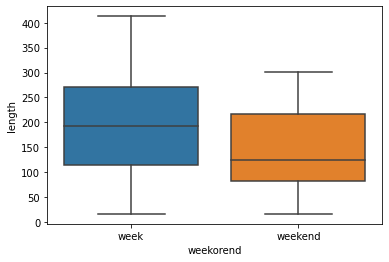

In [48]:
sns.boxplot(data=df, x= "weekorend" ,y = "length")

<AxesSubplot:xlabel='sent', ylabel='length'>

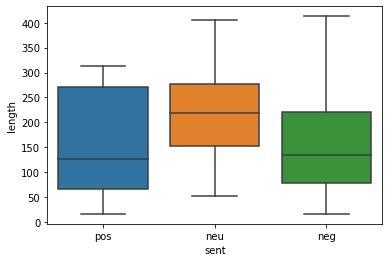

In [49]:
sns.boxplot(data=df, x= "sent" ,y = "length")

In [52]:
df.columns

Index(['lang', 'created_at_x', 'id_x', 'text', 'author_id', 'source',
       'reply_settings', 'conversation_id', 'retweet_count', 'reply_count',
       'like_count', 'quote_count', 'in_reply_to_user_id', 'geo.place_id',
       'description', 'name', 'id_y', 'created_at_y', 'username', 'verified',
       'followers_count', 'following_count', 'tweet_count', 'listed_count',
       'length', 'sent', 'date', 'day', 'month', 'year', 'dayofweek',
       'weekorend', 'has', 'men', 'sent_neg', 'sent_neu', 'sent_pos',
       'weekorend_week', 'weekorend_weekend'],
      dtype='object')

In [64]:
df["date_day"]= df.apply(lambda x: datetime.datetime(x.year,x.month,x.day),1)

<AxesSubplot:xlabel='month'>

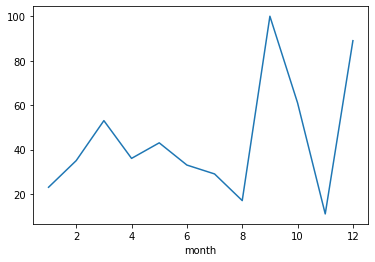

In [75]:
df[df.year==2021].groupby("month").count()["conversation_id"].plot()

<AxesSubplot:xlabel='day'>

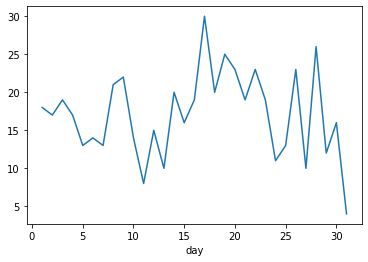

In [76]:
df[df.year==2021].groupby("day").count()["conversation_id"].plot()

<AxesSubplot:xlabel='dayofweek'>

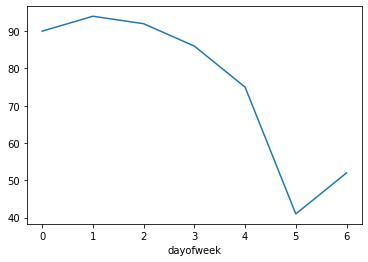

In [77]:
df[df.year==2021].groupby("dayofweek").count()["conversation_id"].plot()


<AxesSubplot:xlabel='date_day'>

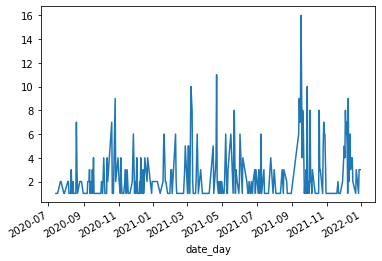

In [73]:
df.groupby("date_day").count()["conversation_id"].plot()

<AxesSubplot:xlabel='sent'>

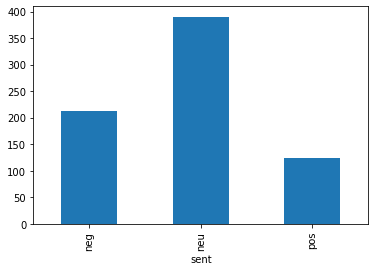

In [82]:
df.groupby("sent").count()["conversation_id"].plot.bar()

In [87]:
df["hour"] = df.date.dt.hour

<AxesSubplot:xlabel='hour'>

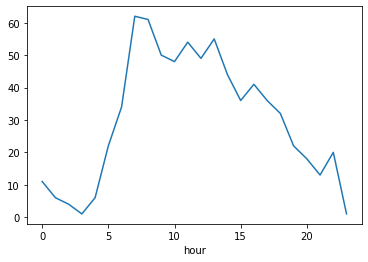

In [89]:
df.groupby("hour").count()["conversation_id"].plot()

In [83]:
import matplotlib.pyplot as plt

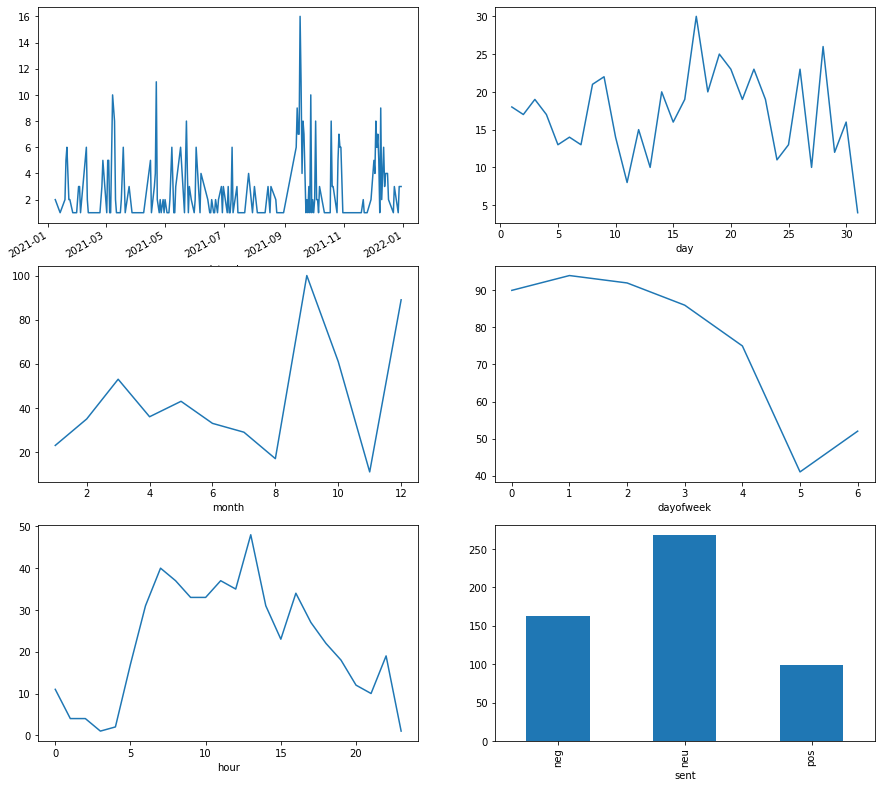

In [94]:
fig, ax = plt.subplots(3,2, figsize=(15,15))

df[df.year==2021].groupby("date_day").count()["conversation_id"].plot(ax=ax[0,0])
df[df.year==2021].groupby("day").count()["conversation_id"].plot(ax=ax[0,1])
df[df.year==2021].groupby("month").count()["conversation_id"].plot(ax=ax[1,0])
df[df.year==2021].groupby("dayofweek").count()["conversation_id"].plot(ax=ax[1,1])
df[df.year==2021].groupby("hour").count()["conversation_id"].plot(ax=ax[2,0])
df[df.year==2021].groupby("sent").count()["conversation_id"].plot.bar()

plt.savefig("time_step")

In [153]:
df_temp = df[["date_day","conversation_id"]].groupby("date_day").count()
df_temp["30days"]= df_temp.rolling(7).mean()
df_temp.dropna()[df_temp.dropna().apply(lambda x: (x.conversation_id - x["30days"]) / x["30days"], 1) > 1]

,conversation_id,30days
date_day,,
2020-08-19,7,2.000000
2020-10-06,4,1.571429
2020-10-20,7,2.857143
2020-10-26,9,3.571429
2020-11-27,6,2.428571
2021-01-19,5,2.428571
2021-01-20,6,2.714286
2021-02-09,6,2.285714
2021-02-25,3,1.428571


In [209]:
df[df.text.apply(lambda x: all([True if "@" in i else False for i in x.split() ]))]

,lang,created_at_x,id_x,text,author_id,source,reply_settings,conversation_id,retweet_count,reply_count,...,weekorend,has,men,sent_neg,sent_neu,sent_pos,weekorend_week,weekorend_weekend,date_day,hour
288,und,2021-03-08T16:22:50.000Z,1368960408531447815,@CarstenDierig @stepstone_de @welt @BV_Buerohund,39738491,Twitter for iPhone,everyone,1368959119923773445,0,0,...,week,0,4,1,0,0,1,0,2021-03-08,16
361,und,2021-05-23T00:08:12.000Z,1396256615209349122,@21Savic1 @straajo @jugglerz007 @stepstone_de,1197062557435092993,Twitter for Android,everyone,1396245199903416321,0,2,...,weekend,0,4,1,0,0,0,1,2021-05-23,0
639,und,2021-12-16T20:30:11.000Z,1471578425441857540,@stepstone_de @iam_simsi\n@fataikolade1\n@Ifea...,1356668170090782720,Twitter for Android,everyone,1465596711984795653,0,0,...,week,0,6,1,0,0,1,0,2021-12-16,20
694,und,2021-12-04T18:03:01.000Z,1467192735648169991,@stepstone_de @Jhorn_trumpet,1452644158305353737,Twitter for Android,everyone,1465596711984795653,0,0,...,weekend,0,2,1,0,0,0,1,2021-12-04,18


In [178]:
len("#stepstone#ha#ta".split("#"))  == "#stepstone#ha#ta".count("#")

False

In [208]:
all([True if "#" in i else False for i in "#stepstone #ha#ta  ".split() ])

True

In [184]:
len("#stepstone#ha#ta".split("#")) 

4

<AxesSubplot:xlabel='date_day'>

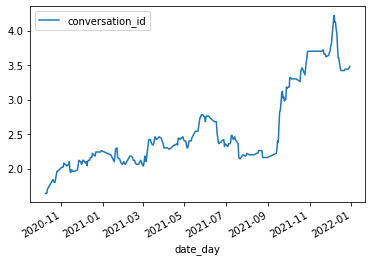

In [158]:
df_temp = df[["date_day","conversation_id"]].groupby("date_day").count()


In [211]:
from scipy.stats import pearsonr
import numpy as np

In [212]:
df_temp = df.groupby("author_id").agg({'retweet_count':'sum', 'reply_count':'sum', 'like_count':'sum', 'quote_count':'sum',
                          'followers_count':'mean', 'following_count':'mean', 'tweet_count':'mean','length':'mean',
                            'has':'sum', 'men':'sum', 'sent_neg':'sum', 'sent_neu':'sum', 'sent_pos':'sum',
                            'weekorend_week':'mean', 'weekorend_weekend':'mean'})

rho = df_temp.corr()
pval = df_temp.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
rho.round(2).astype(str) + p

,retweet_count,reply_count,like_count,quote_count,followers_count,following_count,tweet_count,length,has,men,sent_neg,sent_neu,sent_pos,weekorend_week,weekorend_weekend
retweet_count,1.0***,0.35***,0.76***,0.61***,0.17***,0.11**,0.02,0.26***,0.5***,0.41***,0.02,0.42***,0.25***,0.07,-0.07
reply_count,0.35***,1.0***,0.53***,0.1**,0.22***,0.03,0.1**,0.05,0.25***,0.66***,0.33***,0.01,0.74***,-0.01,0.01
like_count,0.76***,0.53***,1.0***,0.41***,0.22***,0.09*,0.04,0.16***,0.4***,0.46***,0.09*,0.28***,0.37***,0.04,-0.04
quote_count,0.61***,0.1**,0.41***,1.0***,0.02,0.05,-0.04,0.22***,0.45***,0.21***,0.02,0.33***,-0.01,0.03,-0.03
followers_count,0.17***,0.22***,0.22***,0.02,1.0***,0.2***,0.36***,0.1**,0.12**,0.19***,-0.05,0.05,0.22***,0.07,-0.07
following_count,0.11**,0.03,0.09*,0.05,0.2***,1.0***,0.32***,0.03,0.03,0.05,-0.06,0.05,0.01,0.04,-0.04
tweet_count,0.02,0.1**,0.04,-0.04,0.36***,0.32***,1.0***,-0.07,-0.03,0.02,0.08,-0.02,-0.02,-0.04,0.04
length,0.26***,0.05,0.16***,0.22***,0.1**,0.03,-0.07,1.0***,0.26***,0.16***,-0.15***,0.21***,-0.03,0.19***,-0.19***
has,0.5***,0.25***,0.4***,0.45***,0.12**,0.03,-0.03,0.26***,1.0***,0.7***,0.14***,0.67***,0.34***,0.05,-0.05
men,0.41***,0.66***,0.46***,0.21***,0.19***,0.05,0.02,0.16***,0.7***,1.0***,0.3***,0.48***,0.73***,0.04,-0.04


In [214]:
df_c = rho.round(2).astype(str) + p

In [219]:

dfi.export(df_c,"mytable.png")

In [ ]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(df)
visu.poof()

In [18]:
import sqlite3
import sqlalchemy
from sqlalchemy import create_engine 
import pandas as pd
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [19]:
con = sqlite3.connect('twitter_step.db')

cursor = con.cursor()
str_connection = 'sqlite:///twitter_step.db'

engine = create_engine(str_connection)

In [20]:
d = {}
for i in df_data.columns:
    if "public_metric" in i:
        v = i.split(".")[1]
        d[i] = v
df_data = df_data.rename(columns=d)

In [21]:
d = {}
for i in df_user.columns:
    if "public_metric" in i:
        v = i.split(".")[1]
        d[i] = v
df_user = df_user.rename(columns=d)

In [22]:
df_data.to_sql("tweets", con)
df_user.to_sql("user", con)


In [23]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('tweets',), ('user',)]


In [31]:
pd.read_sql('select * from tweets, user where author_id = user.id', engine)

,index,created_at,author_id,reply_settings,conversation_id,source,id,text,lang,retweet_count,...,verified,created_at,name,username,id,description,followers_count,following_count,tweet_count,listed_count
0,0,2020-07-29T16:40:57.000Z,1257402849178333185,everyone,1288514861765468161,Twitter for iPhone,1288514861765468161,Ihr sucht einen Job mit #Homeoffice?Damit seid...,de,0,...,0,2020-05-04T20:14:03.000Z,Generation Homeoffice,GenHomeoffice,1257402849178333185,Wir sind die neue Webpräsenz rund um das Thema...,80,222,143,0
1,1,2020-07-28T16:20:03.000Z,3130698441,everyone,1288147213714100227,Sprout Social,1288147213714100227,Der aktuelle Gehaltsreport von @stepstone_de b...,de,0,...,0,2015-03-31T13:23:34.000Z,Talentsoft DACH,Talentsoft_DE,3130698441,Talentsoft ist ein führender Anbieter von #HRI...,368,404,1896,166
2,2,2020-07-23T17:38:00.000Z,14657622,everyone,1286354891959611403,Twitter Web App,1286354891959611403,In welchem #Beruf kann man ein üppiges Gehalt ...,de,0,...,1,2008-05-05T09:12:13.000Z,BASIC thinking,basicthinking,14657622,"Dein Online-Magazin rund um Social Media, Mark...",38089,744,31719,1697
3,3,2020-08-31T04:09:56.000Z,1861471160,everyone,1300284662728753160,Twitter for iPhone,1300284662728753160,Das Kurzbriefing mit News und Tipps zum Start ...,de,1,...,0,2013-09-13T19:11:43.000Z,Sven Lechtleitner,lechtleitner,1861471160,Autor & Journalist | Chefredakteur Magazin „Hu...,1249,244,353,47
4,4,2020-08-28T20:44:55.000Z,1241864005704208396,everyone,1298947823900164098,Twitter for Android,1299447896950140929,@olewin @AndreasStiehler @iaostuttgart @iab_ne...,de,0,...,0,2020-03-22T23:07:44.000Z,Dr. Alexandra Heinzelmann,HeinzelmannDr,1241864005704208396,"Führungskräftetraining, Online-Coaching, Feel-...",338,941,300,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,714,2021-11-22T13:58:45.000Z,483915659,everyone,1462782606420987905,Twitter for Android,1462782606420987905,Morgen ist @WELT Transformationsgipfel. Ich mo...,de,1,...,1,2012-02-05T14:43:53.000Z,Curd Wunderlich,CurdWunderlich,483915659,Managing Editor Wirtschaft & Innovation @welt....,1728,1153,4454,33
715,715,2021-11-21T13:32:35.000Z,2763788395,everyone,1462413633661636611,Twitter for Android,1462413633661636611,@stepstone_de ist Omi eigentlich Ingrid von #i...,de,0,...,0,2014-08-24T19:55:10.000Z,Fussel,FusselHeiko,2763788395,,6,188,97,0
716,716,2021-11-21T09:35:32.000Z,1383734492846690316,everyone,1462353980080726016,Twitter for Android,1462353980080726016,"@stepstone_de Sorry, eure Werbung ist mega bek...",de,0,...,0,2021-04-18T10:50:01.000Z,Thomas Backsmann,BacksmannThomas,1383734492846690316,,1,12,535,0
717,717,2021-11-19T18:56:51.000Z,19295263,everyone,1461770463860989960,Twitter for iPhone,1461770463860989960,Aus dem Fachkräftemangel wird ein Arbeitskräft...,de,0,...,0,2009-01-21T16:50:42.000Z,Christoph Stanek,stanek_c,19295263,"Nordlicht, Vater, Digitales, Analoges und die ...",539,530,3993,21


In [25]:
pd.read_sql('select * from tweets letf join user on user.id = author_id', engine)

,index,created_at,author_id,reply_settings,conversation_id,source,id,text,lang,retweet_count,...,verified,created_at,name,username,id,description,followers_count,following_count,tweet_count,listed_count
0,0,2020-07-29T16:40:57.000Z,1257402849178333185,everyone,1288514861765468161,Twitter for iPhone,1288514861765468161,Ihr sucht einen Job mit #Homeoffice?Damit seid...,de,0,...,0,2020-05-04T20:14:03.000Z,Generation Homeoffice,GenHomeoffice,1257402849178333185,Wir sind die neue Webpräsenz rund um das Thema...,80,222,143,0
1,1,2020-07-28T16:20:03.000Z,3130698441,everyone,1288147213714100227,Sprout Social,1288147213714100227,Der aktuelle Gehaltsreport von @stepstone_de b...,de,0,...,0,2015-03-31T13:23:34.000Z,Talentsoft DACH,Talentsoft_DE,3130698441,Talentsoft ist ein führender Anbieter von #HRI...,368,404,1896,166
2,2,2020-07-23T17:38:00.000Z,14657622,everyone,1286354891959611403,Twitter Web App,1286354891959611403,In welchem #Beruf kann man ein üppiges Gehalt ...,de,0,...,1,2008-05-05T09:12:13.000Z,BASIC thinking,basicthinking,14657622,"Dein Online-Magazin rund um Social Media, Mark...",38089,744,31719,1697
3,3,2020-08-31T04:09:56.000Z,1861471160,everyone,1300284662728753160,Twitter for iPhone,1300284662728753160,Das Kurzbriefing mit News und Tipps zum Start ...,de,1,...,0,2013-09-13T19:11:43.000Z,Sven Lechtleitner,lechtleitner,1861471160,Autor & Journalist | Chefredakteur Magazin „Hu...,1249,244,353,47
4,4,2020-08-28T20:44:55.000Z,1241864005704208396,everyone,1298947823900164098,Twitter for Android,1299447896950140929,@olewin @AndreasStiehler @iaostuttgart @iab_ne...,de,0,...,0,2020-03-22T23:07:44.000Z,Dr. Alexandra Heinzelmann,HeinzelmannDr,1241864005704208396,"Führungskräftetraining, Online-Coaching, Feel-...",338,941,300,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,714,2021-11-22T13:58:45.000Z,483915659,everyone,1462782606420987905,Twitter for Android,1462782606420987905,Morgen ist @WELT Transformationsgipfel. Ich mo...,de,1,...,1,2012-02-05T14:43:53.000Z,Curd Wunderlich,CurdWunderlich,483915659,Managing Editor Wirtschaft & Innovation @welt....,1728,1153,4454,33
715,715,2021-11-21T13:32:35.000Z,2763788395,everyone,1462413633661636611,Twitter for Android,1462413633661636611,@stepstone_de ist Omi eigentlich Ingrid von #i...,de,0,...,0,2014-08-24T19:55:10.000Z,Fussel,FusselHeiko,2763788395,,6,188,97,0
716,716,2021-11-21T09:35:32.000Z,1383734492846690316,everyone,1462353980080726016,Twitter for Android,1462353980080726016,"@stepstone_de Sorry, eure Werbung ist mega bek...",de,0,...,0,2021-04-18T10:50:01.000Z,Thomas Backsmann,BacksmannThomas,1383734492846690316,,1,12,535,0
717,717,2021-11-19T18:56:51.000Z,19295263,everyone,1461770463860989960,Twitter for iPhone,1461770463860989960,Aus dem Fachkräftemangel wird ein Arbeitskräft...,de,0,...,0,2009-01-21T16:50:42.000Z,Christoph Stanek,stanek_c,19295263,"Nordlicht, Vater, Digitales, Analoges und die ...",539,530,3993,21


In [38]:
pd.read_sql('''select * from tweets''',engine).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   index                719 non-null    int64 
 1   created_at           719 non-null    object
 2   author_id            719 non-null    object
 3   reply_settings       719 non-null    object
 4   conversation_id      719 non-null    object
 5   source               719 non-null    object
 6   id                   719 non-null    object
 7   text                 719 non-null    object
 8   lang                 719 non-null    object
 9   retweet_count        719 non-null    int64 
 10  reply_count          719 non-null    int64 
 11  like_count           719 non-null    int64 
 12  quote_count          719 non-null    int64 
 13  in_reply_to_user_id  334 non-null    object
 14  geo.place_id         25 non-null     object
dtypes: int64(5), object(10)
memory usage: 84.4+ KB


In [51]:
df_c = pd.read_sql('''select sum (retweet_count) as sum_rt,sum(like_count) as sum_like, 
sum(quote_count) as sum_quote, sum(reply_count) as sum_reply, count(id) count_tweets
from tweets GROUP BY (author_id)''',engine)

df_c.head()

,sum_rt,sum_like,sum_quote,sum_reply,count_tweets
0,0,4,0,1,2
1,0,0,0,0,1
2,0,3,0,0,1
3,39,117,1,5,1
4,0,2,0,0,2


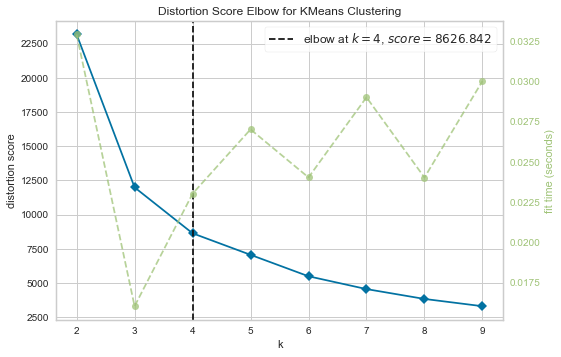

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [52]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(df_c)
visu.poof()

In [55]:
kmeans = KMeans(visu.elbow_value_)
kmeans.fit(df_c)
df_c["cluster"] = kmeans.predict(df_c)

df_c.groupby("cluster").mean()

,sum_rt,sum_like,sum_quote,sum_reply,count_tweets
cluster,,,,,
0,0.210210,1.087087,0.045045,0.246246,1.249249
1,15.600000,91.200000,0.600000,8.600000,6.800000
2,2.196721,9.442623,0.213115,1.213115,2.524590
3,13.230769,33.923077,1.615385,1.615385,8.846154


In [58]:
df_c = pd.read_sql('''select sum (retweet_count) as sum_rt,sum(like_count) as sum_like, 
sum(quote_count) as sum_quote, sum(reply_count) as sum_reply, count(id) count_tweets, avg(length(text)) as mean_lenght_text
from tweets GROUP BY (author_id)''',engine)

df_c.head()


,sum_rt,sum_like,sum_quote,sum_reply,count_tweets,mean_lenght_text
0,0,4,0,1,2,61.5
1,0,0,0,0,1,121.0
2,0,3,0,0,1,171.0
3,39,117,1,5,1,276.0
4,0,2,0,0,2,104.5


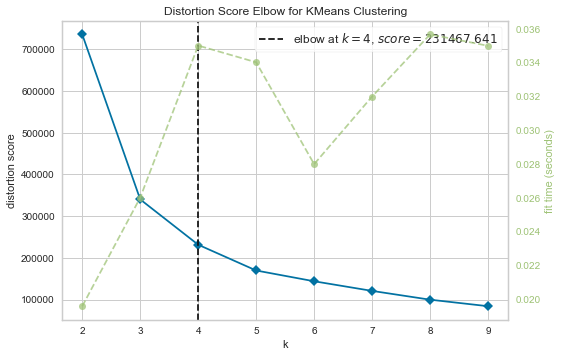

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [59]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(df_c)
visu.poof()

In [60]:
kmeans = KMeans(visu.elbow_value_)
kmeans.fit(df_c)
df_c["cluster"] = kmeans.predict(df_c)

df_c.groupby("cluster").mean()

,sum_rt,sum_like,sum_quote,sum_reply,count_tweets,mean_lenght_text
cluster,,,,,,
0,2.418605,6.891473,0.279070,0.651163,1.906977,273.318440
1,0.046729,2.757009,0.009346,0.476636,1.261682,65.412773
2,1.373494,5.132530,0.168675,0.578313,2.602410,184.603692
3,0.247312,2.419355,0.010753,0.397849,1.311828,124.165771
